In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


In [2]:
df = pd.read_csv('spam.csv', encoding='latin-1')

In [3]:
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df.shape

(5572, 5)

In [6]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


# Data cleaning

In [7]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
df.rename(columns={'v1':'type','v2':'text'},inplace = True)
df.head()

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
from sklearn.preprocessing import LabelEncoder
encod = LabelEncoder()

In [11]:
df['type']=encod.fit_transform(df['type'])

In [12]:
df.head()

,type,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
#checking for null values
df.isnull().sum()

type    0
text    0
dtype: int64

In [14]:
#checking for duplicates
df.duplicated().sum()

403

In [15]:
#deleting duplicate values
df=df.drop_duplicates(keep='first')

In [16]:
df.duplicated().sum()

0

In [17]:
df.shape

(5169, 2)

## EDA

In [18]:
df['type'].value_counts()

type
0    4516
1     653
Name: count, dtype: int64

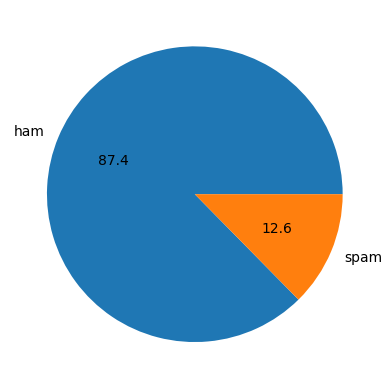

In [19]:
import matplotlib.pyplot as plt
plt.pie(df['type'].value_counts(),labels=['ham','spam'],autopct="%0.1f")
plt.show()

In [20]:
#data is not balanced, since we can see ham is way bigger than spam

In [21]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Desktop\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
#number of characters in data set
df['num_characters'] = df['text'].apply(len)

In [23]:
df.head()

,type,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [24]:
#number of words
df['num_word'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [25]:
df.head()

,type,text,num_characters,num_word
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [26]:
#number of sentences
df['num_sent'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,type,text,num_characters,num_word,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [27]:
df[['num_characters','num_word','num_sent']].describe()

,num_characters,num_word,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [28]:
#targeting ham
df[df['type']==0][['num_characters','num_word','num_sent']].describe()

,num_characters,num_word,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [29]:
#targeting spam
df[df['type']==1][['num_characters','num_word','num_sent']].describe()

,num_characters,num_word,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [30]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

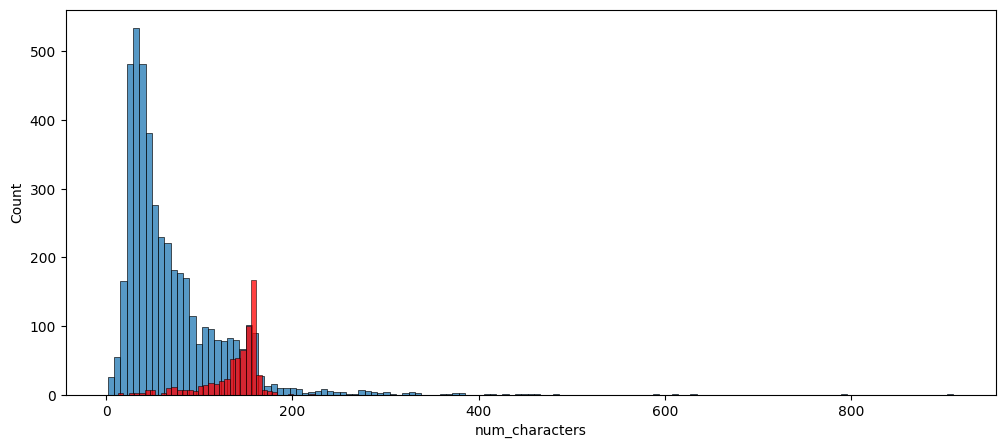

In [31]:
plt.figure(figsize=(12,5))
sns.histplot(df[df['type']==0]['num_characters'])
sns.histplot(df[df['type']==1]['num_characters'],color='red')

<Axes: xlabel='num_word', ylabel='Count'>

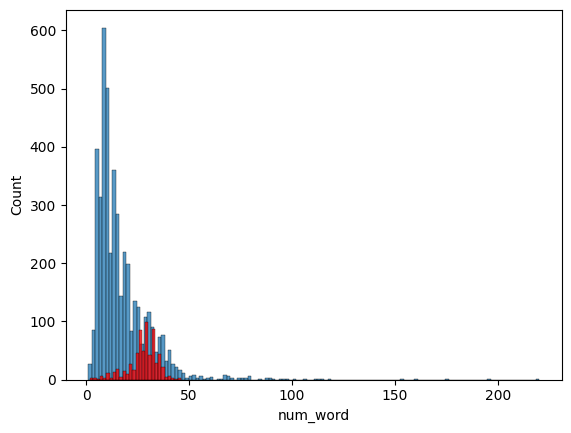

In [32]:
sns.histplot(df[df['type']==0]['num_word'])
sns.histplot(df[df['type']==1]['num_word'],color='red')

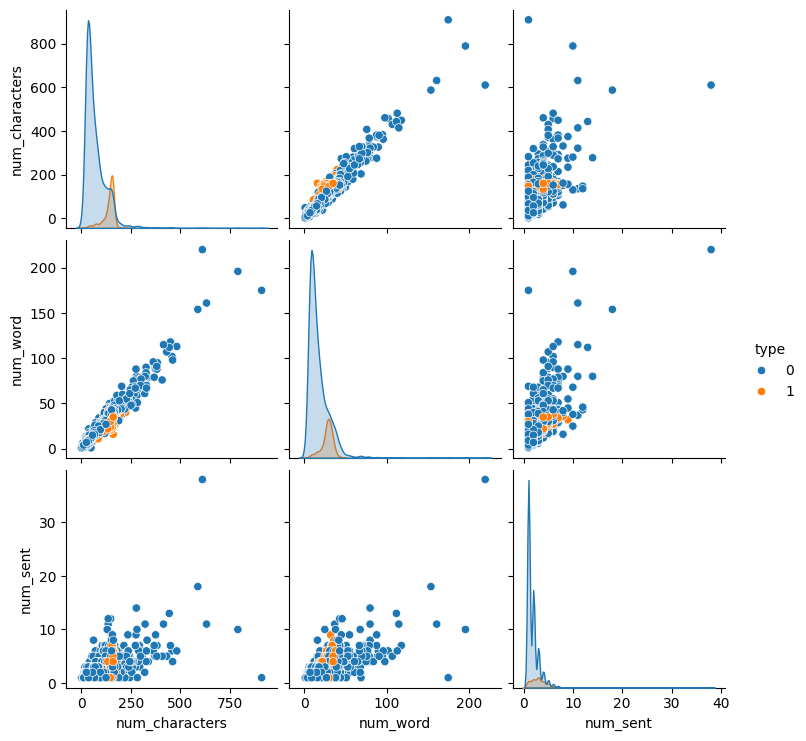

In [33]:
sns.pairplot(df,hue='type')

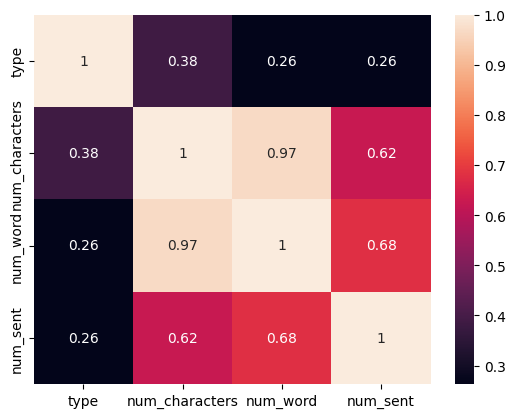

In [34]:
#sns.heatmap(df.corr(),annot=True)
import seaborn as sns
import pandas as pd

# Assuming df is your DataFrame
# Drop non-numeric columns
numeric_df = df.select_dtypes(include='number')

# Plot the heatmap
sns.heatmap(numeric_df.corr(), annot=True)
plt.show()

# Data Pre-processing

In [36]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Desktop\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [37]:
ps = PorterStemmer()
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)
            

In [38]:
transformed_text = transform_text('Even my brother is not like to speak with me. They treat me like aids patent.')
print(transformed_text)

even brother like speak treat like aid patent


In [39]:
df['text'][8]

'WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.'

In [40]:
df['transformed_text']=df['text'].apply(transform_text)


In [41]:
df.head()

,type,text,num_characters,num_word,num_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [42]:
spam_corpus = []
for msg in df[df['type']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [43]:
len(spam_corpus)

9939

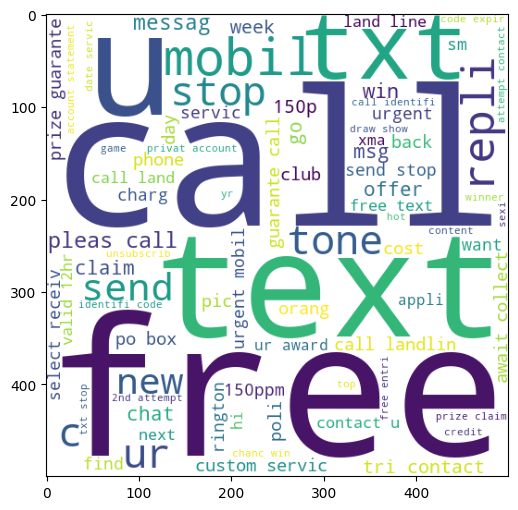

In [44]:
#WordCloud for SPAM
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
spam_wc = wc.generate(df[df['type'] == 1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

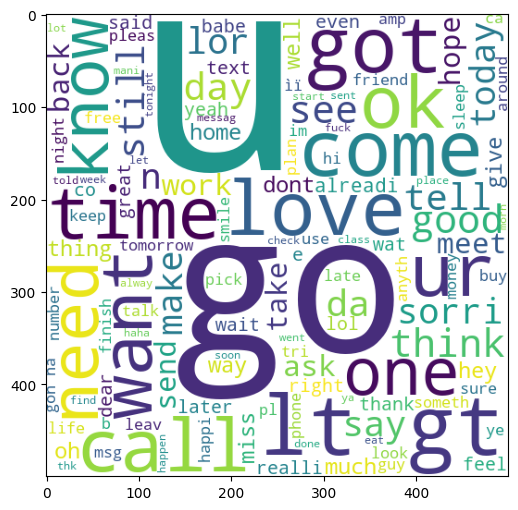

In [45]:
#WordCloud for HAM
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
spam_wc = wc.generate(df[df['type'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [46]:
#from collections import Counter
#sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
#plt.xticks(rotation='vertical')
#plt.show()

In [47]:
ham_corps = []
for msg in df[df['type']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corps.append(word)

In [48]:
len(ham_corps)

35404

In [49]:
#from collections import Counter
#sns.barplot(pd.DataFrame(Counter(ham_corps).most_common(30))[0],pd.DataFrame(Counter(ham_corps).most_common(30))[1])
#plt.xticks(rotation='vertical')
#plt.show()

In [50]:
#Tried SMOTE method
#from sklearn.feature_extraction.text import TfidfVectorizer
#from imblearn.over_sampling import SMOTE
#import pandas as pd

# Load your imbalanced dataset
# Assuming 'df' is a pandas DataFrame containing the text and target variable

# Initialize CountVectorizer
#vectorizer = TfidfVectorizer()

# Convert text data into numerical features
#X = vectorizer.fit_transform(df['text'])

# Initialize SMOTE
#smote = SMOTE(random_state=42)

# Resample the dataset
#X, y = smote.fit_resample(X, df['type'].values)

# Check the class distribution before and after resampling
#print("Class distribution before resampling:")
#print(df['type'].value_counts())

#print("\nClass distribution after resampling:")
#print(pd.Series(y_resampled).value_counts())


# Model Building

In [51]:
#text vectorization
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)


In [52]:
df.head()

,type,text,num_characters,num_word,num_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [53]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [54]:
X.shape

(5169, 3000)

In [55]:
y=df['type'].values

In [56]:
y.shape

(5169,)

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [60]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [61]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_pred = y_pred[:len(y_test)]
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    return accuracy,precision

In [62]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    current_accuracy,current_precision=train_classifier(clf,X_train,y_train,X_test,y_test)
    print("for model:",name)
    print("accuracy  : ",current_accuracy)
    print("precision  : ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    

for model: SVC
accuracy  :  0.9758220502901354
precision  :  0.9747899159663865
for model: KN
accuracy  :  0.9052224371373307
precision  :  1.0
for model: NB
accuracy  :  0.9709864603481625
precision  :  1.0
for model: DT
accuracy  :  0.9274661508704062
precision  :  0.8118811881188119
for model: LR
accuracy  :  0.9584139264990329
precision  :  0.9702970297029703
for model: RF
accuracy  :  0.9758220502901354
precision  :  0.9829059829059829


c:\Users\Desktop\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


for model: AdaBoost
accuracy  :  0.960348162475822
precision  :  0.9292035398230089
for model: BgC
accuracy  :  0.9584139264990329
precision  :  0.8682170542635659
for model: ETC
accuracy  :  0.9748549323017408
precision  :  0.9745762711864406
for model: GBDT
accuracy  :  0.9468085106382979
precision  :  0.9191919191919192
for model: xgb
accuracy  :  0.9671179883945842
precision  :  0.9262295081967213


In [63]:
performnce_df = pd.DataFrame({'Algorithm':clfs.keys(),'Acurracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending = False)

In [64]:
performnce_df

,Algorithm,Acurracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
6,AdaBoost,0.960348,0.929204
10,xgb,0.967118,0.926230
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217


In [65]:
performance_d1 = pd.melt(performnce_df,id_vars = "Algorithm")

In [66]:
performance_d1

,Algorithm,variable,value
0,KN,Acurracy,0.905222
1,NB,Acurracy,0.970986
2,RF,Acurracy,0.975822
3,SVC,Acurracy,0.975822
4,ETC,Acurracy,0.974855
5,LR,Acurracy,0.958414
6,AdaBoost,Acurracy,0.960348
7,xgb,Acurracy,0.967118
8,GBDT,Acurracy,0.946809
9,BgC,Acurracy,0.958414


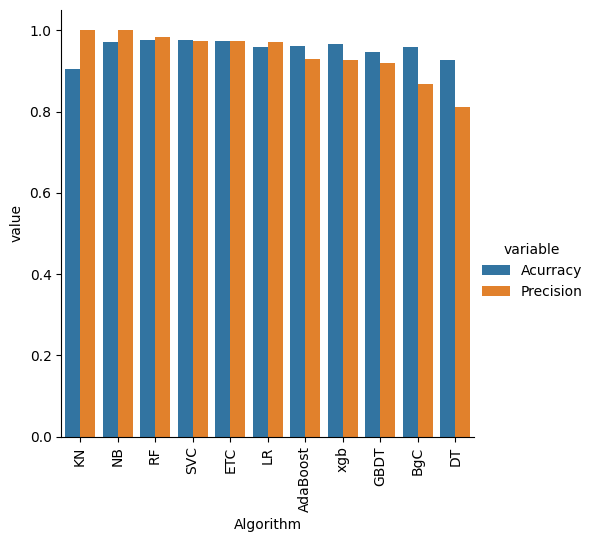

In [67]:
sns.catplot(x = "Algorithm",y = "value",hue = "variable",data = performance_d1, kind = 'bar', height = 5)
plt.xticks(rotation='vertical')
plt.show()

In [68]:
#improve the model
#now lets change the max feature by Tfidf

In [69]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Acurracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [70]:
temp_df

,Algorithm,Acurracy_max_ft_3000,Precision_max_ft_3000
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
6,AdaBoost,0.960348,0.929204
10,xgb,0.967118,0.926230
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217


In [71]:
new_df = performnce_df.merge(temp_df,on='Algorithm')

In [72]:
new_df

,Algorithm,Acurracy,Precision,Acurracy_max_ft_3000,Precision_max_ft_3000
0,KN,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000
2,RF,0.975822,0.982906,0.975822,0.982906
3,SVC,0.975822,0.974790,0.975822,0.974790
4,ETC,0.974855,0.974576,0.974855,0.974576
5,LR,0.958414,0.970297,0.958414,0.970297
6,AdaBoost,0.960348,0.929204,0.960348,0.929204
7,xgb,0.967118,0.926230,0.967118,0.926230
8,GBDT,0.946809,0.919192,0.946809,0.919192
9,BgC,0.958414,0.868217,0.958414,0.868217


In [73]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [74]:
new_df_scaled

,Algorithm,Acurracy,Precision,Acurracy_max_ft_3000_x,Precision_max_ft_3000_x,Acurracy_max_ft_3000_y,Precision_max_ft_3000_y
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
2,RF,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906
3,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
4,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
5,LR,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297
6,AdaBoost,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204
7,xgb,0.967118,0.926230,0.967118,0.926230,0.967118,0.926230
8,GBDT,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192
9,BgC,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217


In [75]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Acurracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [76]:
temp_df

,Algorithm,Acurracy_num_chars,Precision_num_chars
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
6,AdaBoost,0.960348,0.929204
10,xgb,0.967118,0.926230
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217


In [77]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Acurracy,Precision,Acurracy_max_ft_3000_x,Precision_max_ft_3000_x,Acurracy_max_ft_3000_y,Precision_max_ft_3000_y,Acurracy_num_chars,Precision_num_chars
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
2,RF,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906
3,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
4,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
5,LR,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297
6,AdaBoost,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204
7,xgb,0.967118,0.926230,0.967118,0.926230,0.967118,0.926230,0.967118,0.926230
8,GBDT,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192
9,BgC,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217


In [78]:
#Voting Classifier
svc = SVC(kernel = 'sigmoid',gamma = 1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)

from sklearn.ensemble import VotingClassifier

In [79]:
voting = VotingClassifier(estimators=[('svm',svc),('nb',mnb),('et',etc)],voting='soft')

In [80]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [81]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))


Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [82]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [83]:
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9796905222437138
Precision 0.9398496240601504


In [84]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

#sample test data and corresponding labels
X_train = ['Sample text 1','Sample text 2','Sample test 3']
y_train = [0,1,0]

#create and train in Tfidf vectorizer
tfidf = TfidfVectorizer(lowercase=True,stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)

#create and train naive bayes Classifier
mnb = MultinomialNB()
mnb.fit(X_train_tfidf,y_train)

#save the changed TfiDf vector ina file
with open('vectorizer.pkl','wb') as vectorizer_file:
    pickle.dump(tfidf,vectorizer_file)

with open('model.pkl','wb') as model_file:
    pickle.dump(mnb,model_file)


In [85]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))